# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_name =[]
latitude =[]


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city_latlong =(city,lat_lng)
    lat = lat_lng[0]
    
    # If the city is unique, then add it to a our cities list
    if city not in city_name:
        cities.append(city_latlong) 
        city_name.append(city)
        latitude.append(lat)
       
# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
r= requests.get("http://api.openweathermap.org/data/2.5/weather",params ={"appid":api_key,"lon":145.77,"lat":-16.92,"units":"imperial"})
r.text

#lat={lat}&lon={lon}

'{"coord":{"lon":145.77,"lat":-16.92},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":64.29,"pressure":1016,"humidity":88,"temp_min":60.01,"temp_max":68},"visibility":10000,"wind":{"speed":13.87,"deg":180},"clouds":{"all":75},"dt":1562360402,"sys":{"type":1,"id":9490,"message":0.0135,"country":"AU","sunrise":1562359613,"sunset":1562399749},"timezone":36000,"id":2172797,"name":"Cairns","cod":200}'

In [65]:
city_response=[]
temperature=[]
humidity=[]
cloudiness=[]
windspeed=[]
for n,y in cities:
    print (n)
    r= requests.get("http://api.openweathermap.org/data/2.5/weather",params ={"appid":api_key,"units":"imperial","lon":y[1],"lat":y[0]})
    r.text
    city_response.append(r)
    temperature.append(r.json()["main"]["temp"])
    humidity.append(r.json()["main"]["humidity"])
    cloudiness.append(r.json()["clouds"]["all"])
    windspeed.append(r.json()["wind"]["speed"])

urdzhar
ribeira grande
kamaishi
hilo
lavrentiya
torbay
port alfred
mar del plata
zyryanka
papara
marsh harbour
punta arenas
melo
chokurdakh
kirchlinteln
mahebourg
bluff
codrington
geraldton
rikitea
ushuaia
busselton
kapaa
macon
craig
canico
bethel
te anau
new norfolk
taolanaro
ust-nera
dikson
kodiak
elat
vaini
hithadhoo
butaritari
vila
cape town
mount isa
barkhan
mataura
raton
arlit
cherskiy
mantenopolis
thompson
arraial do cabo
hermanus
chimbote
przhevalskoye
kavieng
mys shmidta
castro
pisco
illoqqortoormiut
albany
atuona
savinka
sorvag
tuktoyaktuk
sentyabrskiy
katsuura
ninghai
huilong
abu dhabi
kathu
nanortalik
port-cartier
luganville
nautla
mutsamudu
grand river south east
salalah
cidreira
yeppoon
tsihombe
barrow
kurchum
puerto ayora
ostrovnoy
kurilsk
lasa
nanakuli
severo-kurilsk
lagoa
san patricio
pitimbu
belushya guba
vanimo
vao
kaitangata
montepuez
soyo
puerto baquerizo moreno
honiara
airai
rogers
vaitupu
samalaeulu
manali
muros
chuy
alofi
upernavik
monrovia
jipijapa
khatanga
for

In [66]:
city_response[1].json()["main"]["temp"]

61.79

In [67]:
#create summary 
df_city = pd.DataFrame({'city_name': city_name, 'latitude': latitude,'latitude': latitude,'temperature': temperature, 'humidity': humidity, 'cloudiness': cloudiness,'windspeed':windspeed})
df_city.head()

,city_name,latitude,temperature,humidity,cloudiness,windspeed
0,urdzhar,47.693733,60.35,64,41,8.55
1,ribeira grande,44.357546,61.79,79,5,9.15
2,kamaishi,36.179449,72.95,88,100,8.68
3,hilo,22.635559,72.77,83,72,22.35
4,lavrentiya,79.207069,32.99,96,100,4.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

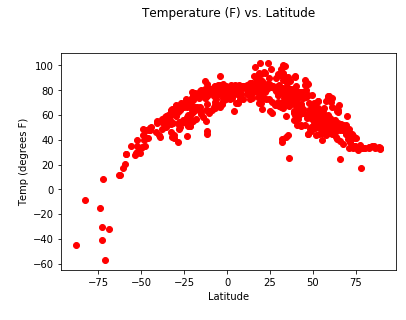

In [68]:
##capture
#Temperature (F) vs. Latitude
#x_lim = 2 * np.pi #set this later

#X-axis: Latitude
#Y-axis: Temperature
x_axis = df_city['latitude']
y_axis = df_city['temperature']


plt.title("Temperature (F) vs. Latitude\n\n")
plt.xlabel("Latitude\n")
plt.ylabel("\nTemp (degrees F)")

#plt.hlines(0,0, x_lim, alpha=0.2) #Idk what this is lol

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('./Fig1_Temp_Latitude.png')

In [69]:
plt.show()

#### Latitude vs. Humidity Plot

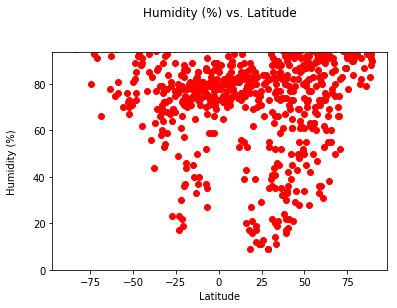

In [70]:
##capture
##Humidity (%) vs. Latitude

#X-axis: Latitude
#Y-axis: Humidity (%)
x_axis = df_city['latitude']
y_axis = df_city['humidity']


y_min= 0
#y_max=y_axis.max()+20

plt.ylim(y_min,y_max)

plt.title("Humidity (%) vs. Latitude\n\n")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)\n")

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('./Fig2_Humidity_Latitude.png')

In [71]:
plt.show()

#### Latitude vs. Cloudiness Plot

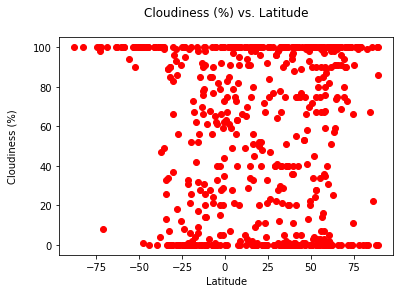

In [72]:
##capture
#Cloudiness (%) vs. Latitude

#X-axis: Latitude
#Y-axis: Cloudiness (%)
x_axis = df_city['latitude']
y_axis = df_city['cloudiness']

#x_min=x_axis.min()-10
#x_max=x_axis.max()+10

#y_min=y_axis.min()-10
#y_max=y_axis.max()+10

#plt.xlim(x_min,x_max)
#plt.ylim(y_min,y_max)

plt.title("Cloudiness (%) vs. Latitude\n")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)\n")

#plt.hlines(0,0, x_lim, alpha=0.2) #Idk what this is lol

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('./Fig3_Cloudiness_Latitude.png')

In [73]:
plt.show()

#### Latitude vs. Wind Speed Plot

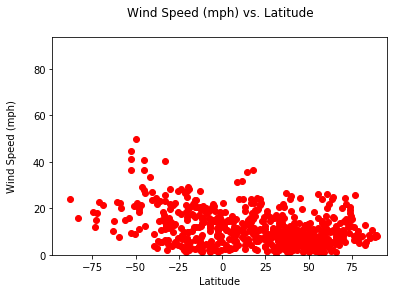

In [74]:
##capture
#Wind Speed (mph) vs. Latitude

#X-axis: Latitude
#Y-axis: Wind Speed (mph)
x_axis = df_city['latitude']
y_axis = df_city['windspeed']

#x_min=x_axis.min()-10
#x_max=x_axis.max()+10

#y_min=y_axis.min()-10
#y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.title("Wind Speed (mph) vs. Latitude\n")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)\n")

#plt.hlines(0,0, x_lim, alpha=0.2) 

plt.scatter(x_axis, y_axis, marker="o", color="red")

#SAVE TO PNG
plt.savefig('./Fig4_WindSpeed_Latitude.png')

In [75]:
plt.show()